#### CSC 180 Intelligent Systems

#### Dr. Haiquan Chen, Dept of Computer Scicence

#### California State University, Sacramento

## Special Lecture:  Creating your AI-driven Web App using Gradio

Gradio is an open-source Python library that lets you create **web-based GUIs** from your machine learning (ML) models in just a few lines of code.

https://github.com/gradio-app/gradio

![link text](https://i.imgur.com/MCfZmjd.png)


### 1. Installation

`gradio` is a Python package, so it can be installed with `pip`.

```Pleae DONOT use gradio version 4.0 for running this lab since 4.0 is a major release```



In [1]:
!pip install gradio==3.48.0
!pip install transformers
!pip install sentencepiece

### 1. Basic Usage: "Hello World"

At it's core, `gradio` allows you to wrap UI elements (components) around Python functions. There are a variety of UI elements including:

* `Image` (drag-and-drop image interface)
* `Textbox` (write freeform text)
* `Microphone` (record audio)
* `Slider` (select a numerical value)

and [many, many more](https://www.gradio.app/docs/components)!

These are just the input components. Most of these have corresponding output components as well.

With gradio, you simply combine 3 ingredients: **a Python function**, an **input component(UI)**, and an **output component(UI)**, and you're ready to go!

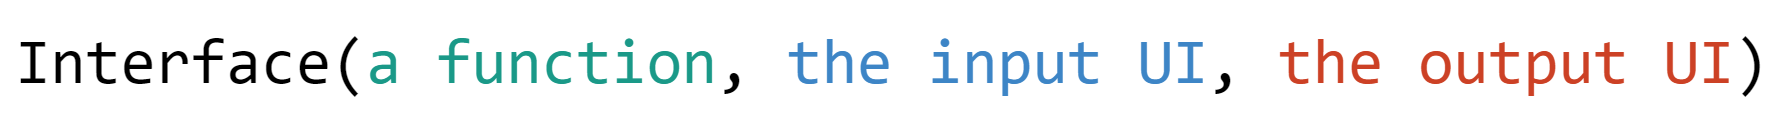

Let's start with a basic example:

In [ ]:
import gradio as gr

def replace(text):
    return text.replace('TensorFlow', 'PyTorch')

gr.Interface(fn=replace,
             inputs='textbox',
             outputs='textbox').launch();

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

IMPORTANT: You are using gradio version 3.48.0, however version 4.44.1 is available, please upgrade.
--------
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0dc5a0569a70a0ac4c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### 2. Image Classification Demos

In [2]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests

inception_net = tf.keras.applications.InceptionV3() # load the model

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def classify_image(inp):
  inp = np.expand_dims(inp, 0)
  inp = tf.keras.applications.inception_v3.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  return {labels[i]: float(prediction[i]) for i in range(1000)}

image = gr.Image(shape=(299, 299))
label = gr.Label(num_top_classes=3)

gr.Interface(fn=classify_image, inputs=image, outputs=label).launch(share=True, debug=True);

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
IMPORTANT: You are using gradio version 3.48.0, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://7a837e98369f989910.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://7a837e98369f989910.gradio.live


### 3. Define Multiple Inputs and Outputs for Your Function

In [3]:
import gradio as gr

def greet(name, is_morning, temperature):
  salutation = "Good morning" if is_morning else "Good evening"
  greeting = "%s %s. It is %s degrees today" % (salutation, name, temperature)
  celsius = (temperature - 32) * 5 / 9
  return greeting, round(celsius, 2)

gr.Interface(
  greet,
  ["text", "checkbox", gr.Slider(0, 100)],   # inputs
  ["text", "number"]).launch();              # outputs

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.48.0, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://9e56521bc105b233bc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Let's build a Web UI for classifying text for sentiment analysis

Here we will use hugginface to get pretrained models: https://huggingface.co/models

In [23]:
import gradio as gr
import re
import warnings

from transformers import (
    AutoTokenizer,
    AutoModel,
    AutoModelForSeq2SeqLM,
    pipeline,
)

In [18]:
sentiment = pipeline("sentiment-analysis", model="finiteautomata/bertweet-base-sentiment-analysis")
# you can swop out "sentiment-analysis" for other task identifiers such as "summarization" or "zero-shot-classification".

def sentiment_analysis(text):
    text = text.encode("ascii", errors="ignore").decode(
        "ascii"
    )  # remove non-ascii, Chinese characters
    text = text.lower()  # lower case
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\n\n", " ", text)
    text = re.sub(r"\t", " ", text)
    text = text.strip(" ")
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation and special characters
    text = re.sub(
        " +", " ", text
    ).strip()  # get rid of multiple spaces and replace with a single
    results = sentiment(text)
    return results[0]["label"], round(results[0]["score"], 3)

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [21]:
gradio_ui = gr.Interface(
    fn=sentiment_analysis,
    title="Sentiment Analysis",
    description="Enter some text for sentiment classification",
    inputs=gr.Textbox(lines=10, label="Paste some text here"),
    outputs=[
        gr.Textbox(label="Sentiment Label"),
        gr.Textbox(label="Sentiment Probability"),
    ],
)

In [22]:

gradio_ui.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://329d042ce2dccdf075.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


### 4. Load multiple functions (UI interfaces) in one web app, either in parallel or in series.

Here we will use hugginface to get pretrained models: https://huggingface.co/models


### Load multiple functions in parallel

In [4]:
import gradio as gr
import re
import warnings


from gradio.mix import Parallel
#from nltk.tokenize import sent_tokenize
from transformers import (
    AutoTokenizer,
    AutoModel,
    AutoModelForSeq2SeqLM,
    #Wav2Vec2ForCTC,
    #Wav2Vec2Tokenizer,
    pipeline,
)

#warnings.filterwarnings('ignore')

#### For example,  I want a web UI for summarizing news articles using the latest transformer models, like BART or ChatGPT.   And I want to compare two different pretrained models.

In [5]:
# Tweak the text cleaning function further if you wish

def clean_text(text):
    text = text.encode("ascii", errors="ignore").decode(
        "ascii"
    )  # remove non-ascii, Chinese characters
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\n\n", " ", text)
    text = re.sub(r"\t", " ", text)
    text = text.strip(" ")
    text = re.sub(
        " +", " ", text
    ).strip()  # get rid of multiple spaces and replace with a single
    return text

Hugging Face's [pipeline allows you to load up several summarization models](https://huggingface.co/transformers/main_classes/pipelines.html#transformers.SummarizationPipeline), from FB's Bart to Google's T5.

Next,  we will use a model from Facebook first:   https://huggingface.co/facebook/bart-large-cnn


In [6]:
pipeline_summ = pipeline(
    "summarization",
    model="facebook/bart-large-cnn", # switch out to "t5-small" etc if you wish
    tokenizer="facebook/bart-large-cnn", # as above
    framework="pt",
)

# First of 2 summarization function
def fb_summarizer(text):
    input_text = clean_text(text)
    results = pipeline_summ(input_text)
    return results[0]["summary_text"]

# First of 2 Gradio apps that we'll put in "parallel"
summary1 = gr.Interface(
    fn=fb_summarizer,
    inputs=gr.Textbox(),
    outputs=gr.Textbox(label="Summary by FB/Bart-large"),
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Next, let's use a pretrained model from Google:  https://huggingface.co/google/pegasus-cnn_dailymail

Not all transformer models finetuned for summarization are compatible with the pipeline. The relatively [newer Pegasus models by Google](https://ai.googleblog.com/2020/06/pegasus-state-of-art-model-for.html) have to be loaded up the "old-fashioned" way as below.

In [8]:
model_name = "google/pegasus-cnn_dailymail" # Pegasus has a few variations; switch out as required

# Second of 2 summarization function
def google_summarizer(text):
    input_text = clean_text(text)

    tokenizer_pegasus = AutoTokenizer.from_pretrained(model_name)

    model_pegasus = AutoModelForSeq2SeqLM.from_pretrained(model_name)

    batch = tokenizer_pegasus.prepare_seq2seq_batch(
        input_text, truncation=True, padding="longest", return_tensors="pt"
    )
    translated = model_pegasus.generate(**batch)

    pegasus_summary = tokenizer_pegasus.batch_decode(
        translated, skip_special_tokens=True
    )

    return pegasus_summary[0]

# Second of 2 Gradio apps that we'll put in "parallel"
summary2 = gr.Interface(
    fn=google_summarizer,
    inputs=gr.Textbox(),
    outputs=gr.Textbox(label="Summary by Google/Pegasus-CNN-Dailymail"),
)


#### Put Two Interfaces IN PARALLEL

In [9]:
Parallel(
    summary1,
    summary2,
    title="Compare 2 AI Summarizers",
    inputs=gr.Textbox(lines=20, label="Paste some English text here"),
).queue().launch(share=True)


# this code may take 2 mins on T4

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.48.0, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://be54667c68f4d447d6.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


#### Put Two Interfaces In Series

Let's try to load 2 models in series for two distinct tasks - first, to translate Chinese text into English, and then summarize the English output.

There are also a few options for translation models on Hugging Face's model hub.  For example, let's use this one: https://huggingface.co/Helsinki-NLP/opus-mt-zh-en

In [10]:
import gradio as gr
import warnings
import re

from gradio.mix import Series
from transformers import pipeline, MarianMTModel, MarianTokenizer

In [11]:
def clean_text(text):
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\n\n", " ", text)
    text = re.sub(r"\t", " ", text)
    text = text.strip(" ")
    text = re.sub(
        " +", " ", text
    ).strip()  # get rid of multiple spaces and replace with a single
    return text

In [12]:
model_name = (
    "Helsinki-NLP/opus-mt-zh-en"
)


def cn_to_eng(text):
    input_text = clean_text(text)

    model = MarianMTModel.from_pretrained(model_name)

    tokenizer = MarianTokenizer.from_pretrained(model_name)

    batch = tokenizer.prepare_seq2seq_batch(input_text, return_tensors="pt")

    output = model.generate(**batch)

    translated = tokenizer.batch_decode(output, skip_special_tokens=True)

    return translated[0]



translation = gr.Interface(
    fn=cn_to_eng, inputs=gr.Textbox(), outputs=gr.Textbox()
)

In [13]:
Series(
    translation,
    summary2,
    title="Translate And Summarize Chinese Text Into English",
    inputs=gr.Textbox(lines=20, label="Paste some Chinese text here"),
    outputs=gr.Textbox(label="English Summary"),
).launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.48.0, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://5f30fe34e6d0cddf41.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## 5. Go multi-modalities:  A speech-to-text app with audio inputs and text output using OpenAI models (Automatic Speech Recognition (ASR))

https://huggingface.co/openai/whisper-base.en

In [14]:
import gradio as gr
from transformers import pipeline
import numpy as np

transcriber = pipeline("automatic-speech-recognition", model="openai/whisper-base.en")

config.json:   0%|          | 0.00/1.94k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.83k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

The transcribe function takes audio, which is a numpy array of the audio the user recorded. The pipeline object expects this in float32 format. Add a state to the interface to store the recorded audio of a user.

transcribe() gets called whenever there is a new small chunk of audio. As the interface runs, the transcribe function gets called, with a record of all the previously spoken audio in stream, as well as the new chunk of audio as new_chunk. We return the new full audio so that can be stored back in state, and we also return the transcription.

In [15]:
def transcribe(stream, new_chunk):
    sr, y = new_chunk
    y = y.astype(np.float32)
    y /= np.max(np.abs(y))

    if stream is not None:
        stream = np.concatenate([stream, y])
    else:
        stream = y
    return stream, transcriber({"sampling_rate": sr, "raw": stream})["text"]


demo = gr.Interface(
    transcribe,
    ["state", gr.Audio(sources=["microphone"], streaming=True)],
    ["state", "text"],
    live=True,
)

demo.launch()

<ipython-input-15-3f6a89272cbf>:15: GradioUnusedKwargWarning: You have unused kwarg parameters in Audio, please remove them: {'sources': ['microphone']}
  ["state", gr.Audio(sources=["microphone"], streaming=True)],


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.48.0, however version 4.44.1 is available, please upgrade.
--------
Running on public URL: https://b50f152a7827cf5b88.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Host your Web UI permanently on Hugging Face Spaces to embed your Gradio demo on any website!

Examples:
* https://huggingface.co/spaces/stabilityai/stable-diffusion-3.5-large
* https://huggingface.co/spaces/KwaiVGI/LivePortrait
* https://huggingface.co/spaces/not-lain/background-removal


![GIF](https://huggingface.co/blog/assets/28_gradio-spaces/spaces-demo-finalized.gif)





References:    

https://github.com/chuachinhon/gradio_nlp/

https://towardsdatascience.com/building-nlp-web-apps-with-gradio-and-hugging-face-transformers-59ce8ab4a319

https://www.gradio.app/guides/real-time-speech-recognition
